## Exploratory Data Analysis of H-1B Visas

How has Trump's Presidency affected H-1B Visas?

In [56]:
# Importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the Dataset
df18 = pd.read_excel('/Users/jpar746/Desktop/Work/h1b18.xlsx')
df17 = pd.read_csv('/Users/jpar746/Desktop/Work/h1b17.csv')
df16 = pd.read_csv('/Users/jpar746/Desktop/Work/h1b16.csv')

In [57]:
# Removing columns that are not necessary from data of df18 and df17
df17 = df17[['CASE_STATUS','EMPLOYMENT_START_DATE','EMPLOYER_NAME',
        'EMPLOYER_STATE','JOB_TITLE','SOC_NAME','PREVAILING_WAGE','PW_UNIT_OF_PAY']]

df18 = df18[['CASE_STATUS','EMPLOYMENT_START_DATE','EMPLOYER_NAME',
        'EMPLOYER_STATE','JOB_TITLE','SOC_NAME','PREVAILING_WAGE','PW_UNIT_OF_PAY']]

# Changing the EMPLOYMENT_START_DATE into a year to comply with 2016 data
df18['EMPLOYMENT_START_DATE'] = df18['EMPLOYMENT_START_DATE'].apply(lambda x: x.year)

df17['EMPLOYMENT_START_DATE'] = pd.to_datetime(df17['EMPLOYMENT_START_DATE'], format = '%Y-%m-%d')
df17['EMPLOYMENT_START_DATE'] = df17['EMPLOYMENT_START_DATE'].apply(lambda x: x.year)

In [58]:
# Only take years 2017 from df17 and years 2018 from df18
df17 = df17.loc[df17['EMPLOYMENT_START_DATE'] == 2017, :]
df18 = df18.loc[df18['EMPLOYMENT_START_DATE'] == 2018, :]

In [59]:
# Change PREVAILING WAGE into yearly wages (Split into Year, Week, Month, Hourly, Bi-weekly)
df18.loc[df18.PREVAILING_WAGE == 0, 'PREVAILING_WAGE'] = np.nan
df18.loc[df18.PW_UNIT_OF_PAY == 'Hour', 'PREVAILING_WAGE'] = df18['PREVAILING_WAGE']*1638
df18.loc[df18.PW_UNIT_OF_PAY == 'Week', 'PREVAILING_WAGE'] = df18['PREVAILING_WAGE']*52
df18.loc[df18.PW_UNIT_OF_PAY == 'Bi-Weekly', 'PREVAILING_WAGE'] = df18['PREVAILING_WAGE']*26
df18.loc[df18.PW_UNIT_OF_PAY == 'Month', 'PREVAILING_WAGE'] = df18['PREVAILING_WAGE']*12

df17.loc[df17.PREVAILING_WAGE == 0, 'PREVAILING_WAGE'] = np.nan
df17.loc[df17.PW_UNIT_OF_PAY == 'Hour', 'PREVAILING_WAGE'] = df17['PREVAILING_WAGE']*1638
df17.loc[df17.PW_UNIT_OF_PAY == 'Week', 'PREVAILING_WAGE'] = df17['PREVAILING_WAGE']*52
df17.loc[df17.PW_UNIT_OF_PAY == 'Bi-Weekly', 'PREVAILING_WAGE'] = df17['PREVAILING_WAGE']*26
df17.loc[df17.PW_UNIT_OF_PAY == 'Month', 'PREVAILING_WAGE'] = df17['PREVAILING_WAGE']*12

# Remove PW_UNIT_OF_PAY 
df17 = df17[['CASE_STATUS','EMPLOYMENT_START_DATE','EMPLOYER_NAME',
        'EMPLOYER_STATE','JOB_TITLE','SOC_NAME','PREVAILING_WAGE']]

df18 = df18[['CASE_STATUS','EMPLOYMENT_START_DATE','EMPLOYER_NAME',
        'EMPLOYER_STATE','JOB_TITLE','SOC_NAME','PREVAILING_WAGE']]

In [60]:
# Dictionary of all States and Shortened State
states = {"AL":"Alabama","AK":"Alaska","AZ":"Arizona","AR":"Arkansas","CA":"California","CO":"Colorado",
          "CT":"Connecticut","DE":"Delaware","FL":"Florida","GA":"Georgia","HI":"Hawaii","ID":"Idaho",
          "IL":"Illinois","IN":"Indiana","IA":"Iowa","KS":"Kansas","KY":"Kentucky","LA":"Louisiana",
          "ME":"Maine","MD":"Maryland","MA":"Massachusetts","MI":"Michigan","MN":"Minnesota","MS":"Mississippi",
          "MO":"Missouri","MT":"Montana","NE":"Nebraska","NV":"Nevada","NH":"New Hampshire","NJ":"New Jersey",
          "NM":"New Mexico","NY":"New York","NC":"North Carolina","ND":"North Dakota","OH":"Ohio","OK":"Oklahoma",
          "OR":"Oregon","PA":"Pennsylvania","RI":"Rhode Island","SC":"South Carolina","SD":"South Dakota",
          "TN":"Tennessee","TX":"Texas","UT":"Utah","VT":"Vermont","VA":"Virginia","WA":"Washington",
          "WV":"West Virginia","WI":"Wisconsin","WY":"Wyoming"}
states = dict((v.upper(), k.upper()) for k, v in states.items())

# Remove the city from the WORKSITE 
df16['WORKSITE'] = df16['WORKSITE'].apply(lambda x: x.split(',')[1])
# Removing the space infront of the states from WORKSITE
df16['WORKSITE'] = df16['WORKSITE'].apply(lambda x: x[1:])
# Replace Worksite with shortened States
df16['WORKSITE'].replace(states, inplace = True)
# Replace WORKSITE with EMPLOYER_STATE
df16.rename(columns={'YEAR':'EMPLOYMENT_START_DATE','WORKSITE':'EMPLOYER_STATE'}, inplace=True)


# Removing unnecessary columns of df16
df16 = df16[['CASE_STATUS','EMPLOYMENT_START_DATE','EMPLOYER_NAME',
        'EMPLOYER_STATE','JOB_TITLE','SOC_NAME','PREVAILING_WAGE']]

In [61]:
# Combining df16, df17, df18 into one dataframe
df = pd.concat([df16,df17,df18])
print(df.head())

           CASE_STATUS  EMPLOYMENT_START_DATE  \
0  CERTIFIED-WITHDRAWN                 2016.0   
1  CERTIFIED-WITHDRAWN                 2016.0   
2  CERTIFIED-WITHDRAWN                 2016.0   
3  CERTIFIED-WITHDRAWN                 2016.0   
4            WITHDRAWN                 2016.0   

                                       EMPLOYER_NAME EMPLOYER_STATE  \
0                             UNIVERSITY OF MICHIGAN             MI   
1                             GOODMAN NETWORKS, INC.             TX   
2                          PORTS AMERICA GROUP, INC.             NJ   
3  GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...             CO   
4                          PEABODY INVESTMENTS CORP.             MO   

                      JOB_TITLE                       SOC_NAME  \
0  POSTDOCTORAL RESEARCH FELLOW  BIOCHEMISTS AND BIOPHYSICISTS   
1       CHIEF OPERATING OFFICER               CHIEF EXECUTIVES   
2         CHIEF PROCESS OFFICER               CHIEF EXECUTIVES   
3   REGIONAL P

In [208]:
# Cleaning the SOC_NAME 
df['SOC_NAME'] = df['SOC_NAME'].apply(lambda x: str(x).upper())
df['SOC_NAME'] = df['SOC_NAME'].apply(lambda x:str(x).replace('COMPUTER SYSTEMS ANALYSTS','COMPUTER SYSTEMS ANALYST'))


In [209]:
# Looking at the number of applications per year 
year_app = df['EMPLOYMENT_START_DATE'].value_counts()
print(year_app)

2016.0    647803
2015.0    618727
2018.0    556038
2017.0    530371
2014.0    519427
2013.0    442114
2012.0    415607
2011.0    358767
Name: EMPLOYMENT_START_DATE, dtype: int64


From the series above, we can see that there are about 500,000 applicants every year. 
We can also see that there has been a decrease in the number of applications in 2017 and 2018 (Trump's Presidency) The figure below highlights the fall in the number of applicants in Trump's Presidency

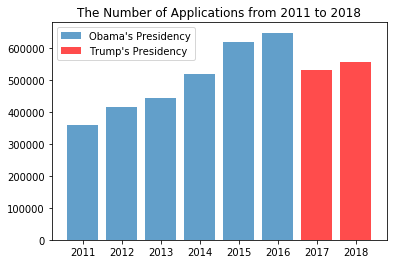

In [210]:
# Bar Chart of the number of applications
year_app = year_app.sort_index()
obama = pd.Series(year_app.values[0:6], index = year_app.index[0:6])
trump = pd.Series(year_app.values[6:], index = year_app.index[6:])

fig, ax = plt.subplots()
plt.bar(obama.index, obama.values, align = 'center', alpha = 0.7,  linewidth=0)
plt.bar(trump.index, trump.values, align = 'center', alpha = 0.7,  linewidth=0, color = '#FF0000')
plt.legend(['Obama\'s Presidency','Trump\'s Presidency'],loc=2)
plt.title('The Number of Applications from 2011 to 2018')
plt.savefig('no of applications.png')

In [211]:
# Heatmap of U.S. H1B visa applicants
# Import statements 
import plotly as plotly
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.io as pio

# Organizing by state 
df_heatmap = df.groupby('EMPLOYER_STATE')['CASE_STATUS'].count()

scl = [
    [0.0, 'rgb(242,240,247)'],
    [0.2, 'rgb(218,218,235)'],
    [0.4, 'rgb(188,189,220)'],
    [0.6, 'rgb(158,154,200)'],
    [0.8, 'rgb(117,107,177)'],
    [1.0, 'rgb(84,39,143)']
]

data = [go.Choropleth(
    colorscale = scl,
    autocolorscale = False,
    locations = df_heatmap.index,
    z = df_heatmap.values.astype(float),
    locationmode = 'USA-states',
    marker = go.choropleth.Marker(
        line = go.choropleth.marker.Line(
            color = 'rgb(255,255,255)',
            width = 2
        )),
    colorbar = go.choropleth.ColorBar(
        title = "")
)]

layout = go.Layout(
    title = go.layout.Title(
        text = 'H1B Visa Applicants'
    ),
    geo = go.layout.Geo(
        scope = 'usa',
        projection = go.layout.geo.Projection(type = 'albers usa'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)'),
)

fig = go.Figure(data = data, layout = layout)
plotly.tools.set_credentials_file(username='jpar746', api_key='z4DayxsEIqnFEGvEUhPO')
py.iplot(fig, filename = 'd3-cloropleth-map')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~jpar746/0 or inside your plot.ly account where it is named 'd3-cloropleth-map'


This choropleth map highlights the location of applicants. From the figure, we can see that the majority of the H-1B visa applicants are applying from California, New York, and Texas. 


In [212]:
# Comparing the number of applications that are accepted or denied (Ignore withdrawn)
accept_arr = df['CASE_STATUS'].value_counts()
print(accept_arr)
accept_val = list(accept_arr)[0:4]
accept_label = list(accept_arr.index)[0:4]

# Out of all the applications we can see that only a small percentage are denied (Exactly 2.67%)
denied = (accept_arr['DENIED'] / df.shape[0]).round(4)
print(str(denied*100) + '%')

CERTIFIED                                             3615378
CERTIFIED-WITHDRAWN                                    241703
WITHDRAWN                                              122466
DENIED                                                 109289
PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED         15
REJECTED                                                    2
INVALIDATED                                                 1
Name: CASE_STATUS, dtype: int64
2.67%


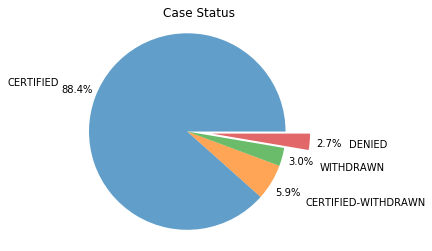

In [213]:
# Pie chart of accepted and denied applications 
fig, ax = plt.subplots()
ax.pie(accept_val, explode = (0,0,0,0.25), labels = accept_label, autopct = '%1.1f%%',
       pctdistance=1.2, labeldistance=1.4, wedgeprops={'alpha':0.7})
ax.axis('equal')
plt.title('Case Status')
plt.show()

It appears that the percentage of cases denied is really low. Upon further research, the denied percentage is not indicative of all the applications denied in the H-1B application process. Additional information is provided by the https://www.uscis.gov/sites/default/files/USCIS/Resources/Reports%20and%20Studies/Immigration%20Forms%20Data/BAHA/non-immigrant-worker-rfe-h-1b-quarterly-data-fy2015-fy2019-q1.pdf


In [214]:
# Looking at the percentage denied over the years 
accept_per = df.groupby('EMPLOYMENT_START_DATE')['CASE_STATUS'].value_counts()
year_per = []
year = []
for i in range(2011,2019):
    year_per.append((accept_per.loc[[i,'DENIED'],'DENIED'].values[0] / accept_per.loc[[i]].sum())*100)
    year.append(i)
denied_per = pd.Series(year_per, index = year)
print(denied_per)

2011    8.119476
2012    5.075949
2013    2.742732
2014    2.290216
2015    1.765399
2016    1.416326
2017    1.406563
2018    1.345771
dtype: float64


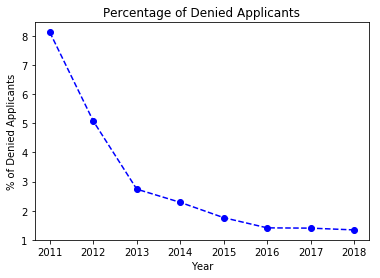

In [215]:
# Scatter plot to look at the increase and decrease in denied applications
plt.plot(denied_per.index, denied_per.values, 'bo', linestyle='dashed')
plt.title('Percentage of Denied Applicants')
plt.xlabel('Year')
plt.ylabel('% of Denied Applicants')
plt.show()

The data from the Department of Labor seems to have been collected after an initial screening from the USCIS
United States Citizenship and Immigration Service. The data shown by the USCIS indicates an increase in the
percentage of rejected applications

https://www.uscis.gov/sites/default/files/USCIS/Resources/Reports%20and%20Studies/Immigration%20Forms%20Data/BAHA/non-immigrant-worker-rfe-h-1b-quarterly-data-fy2015-fy2019-q1.pdf


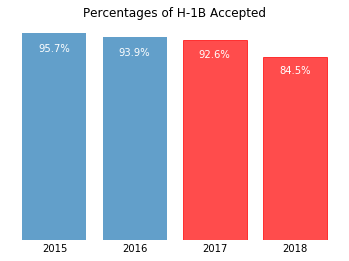

In [216]:
uscis = pd.Series([95.7,93.9,92.6,84.5], index=[2015,2016,2017,2018])
fig, ax = plt.subplots()
bars = plt.bar(uscis.index, uscis.values, align = 'center', alpha = 0.7)
plt.xticks([2015,2016,2017,2018])
# Removing the frame
for spine in plt.gca().spines.values():
    spine.set_visible(False)
# Removing the small ticks 
ax.tick_params(axis=u'both', which=u'both',length=0)
# Removing Y ticks 
ax.set_yticklabels([])
# Placing the values above the bar 
for rect in bars:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 0.9*height, str(height)+'%',
                ha='center', va='bottom', color = 'w')
bars[2].set_color('#FF0000')
bars[3].set_color('#FF0000')
plt.title('Percentages of H-1B Accepted')
plt.savefig('perc of applications.png')
plt.show()

In [217]:
# Looking at 20 companies that provide the most H1B visas
common_co = df['EMPLOYER_NAME'].value_counts()
print(common_co[:20])

INFOSYS LIMITED                                    157815
TATA CONSULTANCY SERVICES LIMITED                   89577
WIPRO LIMITED                                       57551
DELOITTE CONSULTING LLP                             56975
IBM INDIA PRIVATE LIMITED                           44229
ACCENTURE LLP                                       43942
MICROSOFT CORPORATION                               33738
CAPGEMINI AMERICA INC                               29182
ERNST & YOUNG U.S. LLP                              28813
HCL AMERICA, INC.                                   28065
TECH MAHINDRA (AMERICAS),INC.                       23281
LARSEN & TOUBRO INFOTECH LIMITED                    21708
COGNIZANT TECHNOLOGY SOLUTIONS U.S. CORPORATION     21486
GOOGLE INC.                                         20685
IBM CORPORATION                                     19758
INTEL CORPORATION                                   13712
AMAZON CORPORATE LLC                                12631
IGATE TECHNOLO

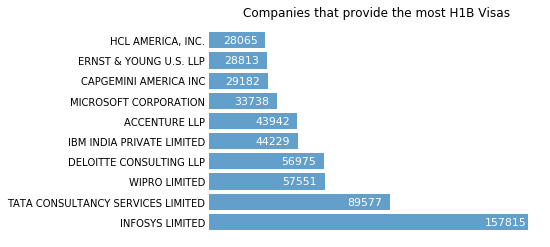

In [218]:
# Bar Chart of companies that provide the most H1B visas
common_co_name = list(common_co[0:10].index)
common_co_freq = list(common_co[0:10])

y_pos = np.arange(len(common_co_name))

# Plotting a horizontal bar chart
fig, ax = plt.subplots()
bars = plt.barh(y_pos, common_co_freq, align = 'center', alpha = 0.7)

# Labeling the bar chart
plt.yticks(y_pos, common_co_name)

# Removing the frame for a cleaner visual
for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
# Removing the small y ticks
ax.tick_params(axis=u'both', which=u'both',length=0)

# Directly labeling the values of the bar chart 
i = 0
for bar in bars:
    plt.gca().text(bar.get_x() + bar.get_width()-21000, i-0.15, str(int(bar.get_width())), 
                 ha='left', color='w', fontsize=11)
    i = i+1
    
# Removing the x-ticks
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

# Setting the title 
plt.title('Companies that provide the most H1B Visas')
plt.savefig('co of applications.png', bbox_inches='tight')

The figure above illustrates the ten companies that have submitted the most number of H-1B Visas. We can observe that the top three companies are all from the technology sector. In fact, most of the companies that apply for H-1B visas are from the technology sector.

In [219]:
# The 10 most common types of jobs that H1B visa are granted for
common_type = df['SOC_NAME'].value_counts()
print(list(common_type[:10].index))
# From the first 10 jobs, we can see that majority of these jobs are related to technology (computers)

['SOFTWARE DEVELOPERS, APPLICATIONS', 'COMPUTER SYSTEMS ANALYST', 'COMPUTER PROGRAMMERS', 'COMPUTER OCCUPATIONS, ALL OTHER', 'SOFTWARE DEVELOPERS, SYSTEMS SOFTWARE', 'MANAGEMENT ANALYSTS', 'ACCOUNTANTS AND AUDITORS', 'FINANCIAL ANALYSTS', 'MECHANICAL ENGINEERS', 'NETWORK AND COMPUTER SYSTEMS ADMINISTRATORS']


In [220]:
# The 10 most common job titles 
common_job = df['JOB_TITLE'].value_counts()
print(list(common_job[:10].index))

['PROGRAMMER ANALYST', 'SOFTWARE ENGINEER', 'SOFTWARE DEVELOPER', 'COMPUTER PROGRAMMER', 'SYSTEMS ANALYST', 'BUSINESS ANALYST', 'COMPUTER SYSTEMS ANALYST', 'SENIOR SOFTWARE ENGINEER', 'ASSISTANT PROFESSOR', 'TECHNOLOGY LEAD - US']


In [125]:
# Looking at data science roles (related like business analyst, data analyst, data engineer) for H1B Visas
data_science_only = df.loc[df['JOB_TITLE']=='DATA SCIENTIST']
bus_analyst = df.loc[df['JOB_TITLE']=='BUSINESS ANALYST']
data_analyst = df.loc[df['JOB_TITLE']=='DATA ANALYST']
data_eng = df.loc[df['JOB_TITLE']=='DATA ENGINEER']
data_science = pd.concat([data_science_only,bus_analyst,data_analyst,data_eng])

# Number of data science and similar roles h1b visas granted
print(data_science.shape[0])

63503


As an aspiring data scientist, I thought that it would be interesting to explore the H-1B application process for data scientist. There were 63,503 applications for data scientists. 

In [126]:
# Looking at the prevailing wages of data science jobs vs other h1b visa jobs
data_science['PREVAILING_WAGE'].describe()

# Non-data science jobs' salaries
not_data_science = df[(df['JOB_TITLE'] != 'DATA SCIENTIST | BUSINESS ANALYST | DATA ANALYST | DATA ENGINEER')]
not_data_science['PREVAILING_WAGE'].describe()

count    4.088677e+06
mean     1.374640e+05
std      4.659213e+06
min      0.000000e+00
25%      5.580600e+04
50%      6.780800e+04
75%      8.525900e+04
max      6.997607e+09
Name: PREVAILING_WAGE, dtype: float64

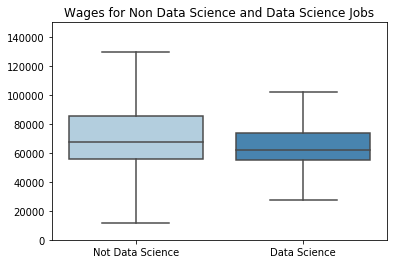

In [134]:
# Boxplot for data science and non data science wages
# Turning values into lists for plotting
data_science = data_science.reset_index(drop=True)
not_data_science = not_data_science.reset_index(drop=True)
plot_box_df = pd.concat([not_data_science['PREVAILING_WAGE'],data_science['PREVAILING_WAGE']],
                        keys=['Not Data Science','Data Science'],axis=1)

sns.boxplot( data = plot_box_df, palette="Blues", showfliers=False)
axes = plt.gca()
axes.set_ylim([0,150000])
plt.title('Wages for Non Data Science and Data Science Jobs')
plt.show()

By comparing the wages for non data science jobs and data science jobs, It appears that there is not a massive difference in the median and mean wage of data science jobs. Both the median appear to be between 60,000 and 80,000. However, the non data science jobs tend to have a larger interquartile range which could be explained by the diverse jobs that other H-1B applicants had.

In [135]:
# Location for Data Science jobs (H1B Applicants)
ds_heatmap = data_science.groupby('EMPLOYER_STATE')['CASE_STATUS'].count()

scl = [
    [0.0, 'rgb(242,240,247)'],
    [0.2, 'rgb(218,218,235)'],
    [0.4, 'rgb(188,189,220)'],
    [0.6, 'rgb(158,154,200)'],
    [0.8, 'rgb(117,107,177)'],
    [1.0, 'rgb(84,39,143)']
]

data = [go.Choropleth(
    colorscale = scl,
    autocolorscale = False,
    locations = ds_heatmap.index,
    z = ds_heatmap.values.astype(float),
    locationmode = 'USA-states',
    marker = go.choropleth.Marker(
        line = go.choropleth.marker.Line(
            color = 'rgb(255,255,255)',
            width = 2
        )),
    colorbar = go.choropleth.ColorBar(
        title = "")
)]

layout = go.Layout(
    title = go.layout.Title(
        text = 'H1B Data Science Applicants'
    ),
    geo = go.layout.Geo(
        scope = 'usa',
        projection = go.layout.geo.Projection(type = 'albers usa'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)'),
)

fig = go.Figure(data = data, layout = layout)
plotly.tools.set_credentials_file(username='jpar746', api_key='z4DayxsEIqnFEGvEUhPO')
py.iplot(fig, filename = 'd3-cloropleth-map')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~jpar746/0 or inside your plot.ly account where it is named 'd3-cloropleth-map'


This is a heatmap of the locations of H-1B Data Science Applicants. We can see that majority of these applications are from California, Texax, New Jersey, and New York